# Statistical Thinking in Python Part 1

## Introduction to exploratory data analysis

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
# print (iris)

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

NameError: name 'versicolor_petal_length' is not defined

In [ ]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram

plt.show()

In [ ]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
print (n_bins)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [ ]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [ ]:
ECDF function

In [35]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)


    # x-data for the ECDF: x
    x = np.sort(data)


    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('')


# Display the plot
plt.show()


In [ ]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, 
marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Introduction to summary statistics:

### The sample mean and median


In [ ]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

### Percentiles, outliers, and box plots

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print (ptiles_vers)

In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


In [ ]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [ ]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


In [ ]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print (np.sqrt(variance))

# Print the standard deviation
print (np.std(versicolor_petal_length))


### Covariance and Pearson correlation

In [ ]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Set margins
_ = plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Petal length')
_ = plt.ylabel('Petal width')

# Show the result
plt.show()

In [ ]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print (covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print (petal_cov)


In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print (r)


### Random number generators and hacker statistics

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

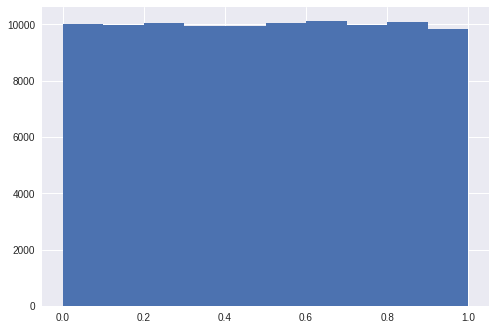

In [32]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


In [33]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


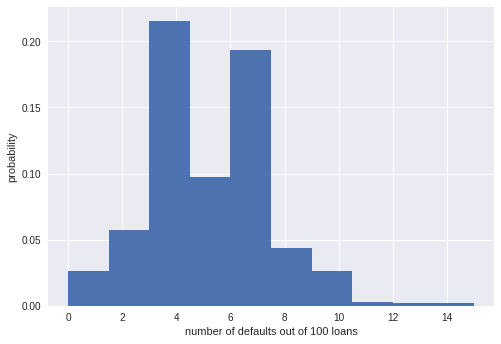

In [34]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


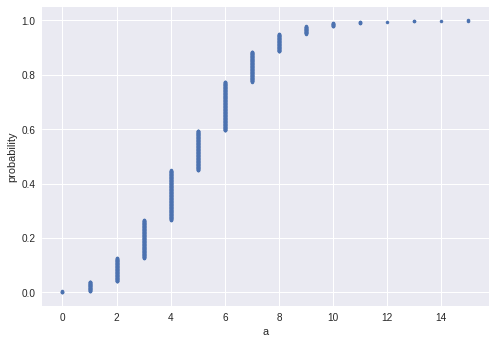

Probability of losing money = 0.022


In [39]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('a')
plt.ylabel('probability')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Probability distributions and stories: The Binomial distribution

In [ ]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()


In [ ]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, normed=True, bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('number of 100 loans')
_ = plt.ylabel('CDF')


# Show the plot
plt.show()


### Poisson processes and the Poisson distribution

In [1]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n, p= [20, 100, 1000], [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n=n[i], p=p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


NameError: name 'np' is not defined

In [ ]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/(10000)

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Game of Chance

Bernoulli trials

np.random.seed(2)



# Thinking probabilistically-- 

### Probability density functions

### Introduction to the Normal distribution

/amyriad/tgl_venv/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


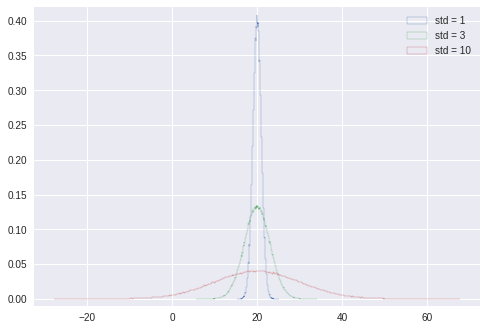

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

samples_std1 = np.random.normal(20, 1, size=1000000)
samples_std3 = np.random.normal(20, 3, size=1000000)
samples_std10 = np.random.normal(20, 10, size=1000000)


_ = plt.hist(samples_std1, bins=500, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=500, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=500, normed=True, histtype='step')


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [ ]:
# real answer

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


In [10]:
x1, y1 = ecdf(samples_std1)
x3, y3 = ecdf(samples_std3)
x10, y10 = ecdf(samples_std10)

_ = plt.plot(x1, y1)
_ = plt.plot(x3, y3)
_ = plt.plot(x10, y10)


NameError: name 'ecdf' is not defined

In [ ]:
# answer

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### The Normal distribution: Properties and warnings

In [ ]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [ ]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(144 >= samples)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


### The Exponential distribution

In [ ]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

In [ ]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, normed=True, histtype='step')


# Label axes
_ = plt.xlabel('waiting times')
_ = plt.ylabel('propability')

# Show the plot
plt.show()


# ============================================================

In [26]:
import numpy as np

np.random.seed(10)

n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size=10) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads/10000
#random_numbers = np.random.random(size=100)
#heads = random_numbers  < 0.5
#heads

#np.sum(heads)

0.2074

In [21]:
2**32-1

4294967295

In [ ]:
'us-presidential-election-county-results-2004-through-2012.csv'

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns


# Set default Seaborn style
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Plot histogram of versicolor petal lengths
plt.hist()


# Show histogram
plt.show()


TypeError: hist() takes at least 1 argument (0 given)

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
list(data.feature_names)

#array([0, 0, 1])
#list(data.target_names)
#list(data.versicolor_petal_length)
#versicolor_petal_length
#['setosa', 'versicolor', 'virginica']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']